In [1]:
# Imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('./data/IBRD_Statement_Of_Loans_-_Historical_Data.csv')

C:\Users\7 GPU Mining rig 1\AppData\Local\Temp\ipykernel_17100\3591503985.py:1: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/IBRD_Statement_Of_Loans_-_Historical_Data.csv')


In [3]:
df.head()

,End of Period,Loan Number,Region,Country Code,Country,Borrower,Guarantor Country Code,Guarantor,Loan Type,Loan Status,...,Repaid 3rd Party,Due 3rd Party,Loans Held,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
0,05/31/2022 12:00:00 AM,IBRD00010,EUROPE AND CENTRAL ASIA,FR,France,CREDIT NATIONAL,FR,France,NPL,Fully Repaid,...,2.499620e+08,0.0,0.0,11/01/1952 12:00:00 AM,05/01/1977 12:00:00 AM,05/09/1947 12:00:00 AM,05/09/1947 12:00:00 AM,06/09/1947 12:00:00 AM,12/31/1947 12:00:00 AM,NaN
1,05/31/2022 12:00:00 AM,IBRD00020,EUROPE AND CENTRAL ASIA,NL,Netherlands,NaN,NaN,NaN,NPL,Fully Repaid,...,8.767200e+07,0.0,0.0,04/01/1952 12:00:00 AM,10/01/1972 12:00:00 AM,08/07/1947 12:00:00 AM,08/07/1947 12:00:00 AM,09/11/1947 12:00:00 AM,03/31/1948 12:00:00 AM,NaN
2,05/31/2022 12:00:00 AM,IBRD00021,EUROPE AND CENTRAL ASIA,NL,Netherlands,NaN,NaN,NaN,NPL,Fully Repaid,...,3.955788e+06,0.0,0.0,04/01/1953 12:00:00 AM,04/01/1954 12:00:00 AM,05/25/1948 12:00:00 AM,08/07/1947 12:00:00 AM,06/01/1948 12:00:00 AM,06/30/1948 12:00:00 AM,NaN
3,05/31/2022 12:00:00 AM,IBRD00030,EUROPE AND CENTRAL ASIA,DK,Denmark,NaN,NaN,NaN,NPL,Fully Repaid,...,2.222900e+07,0.0,0.0,02/01/1953 12:00:00 AM,08/01/1972 12:00:00 AM,08/22/1947 12:00:00 AM,08/22/1947 12:00:00 AM,10/17/1947 12:00:00 AM,03/31/1949 12:00:00 AM,NaN
4,05/31/2022 12:00:00 AM,IBRD00040,EUROPE AND CENTRAL ASIA,LU,Luxembourg,NaN,NaN,NaN,NPL,Fully Repaid,...,1.014200e+07,0.0,0.0,07/15/1949 12:00:00 AM,07/15/1972 12:00:00 AM,08/28/1947 12:00:00 AM,08/28/1947 12:00:00 AM,10/24/1947 12:00:00 AM,03/31/1949 12:00:00 AM,NaN


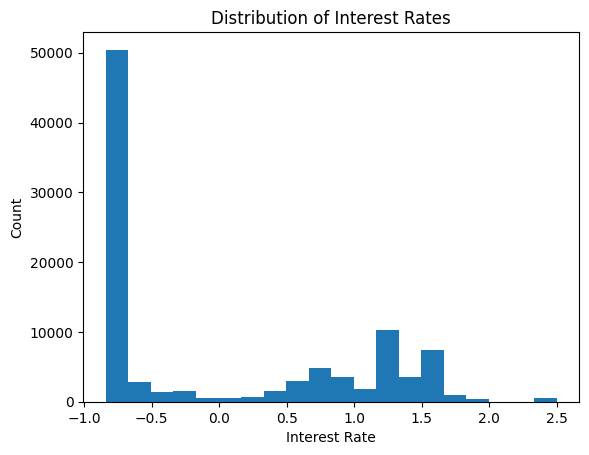

In [11]:
# Interest Rate Histogram
plt.hist(df['Interest Rate'], bins=20)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Distribution of Interest Rates')
plt.savefig('./Images/interest_rate_hist.png')
plt.show()


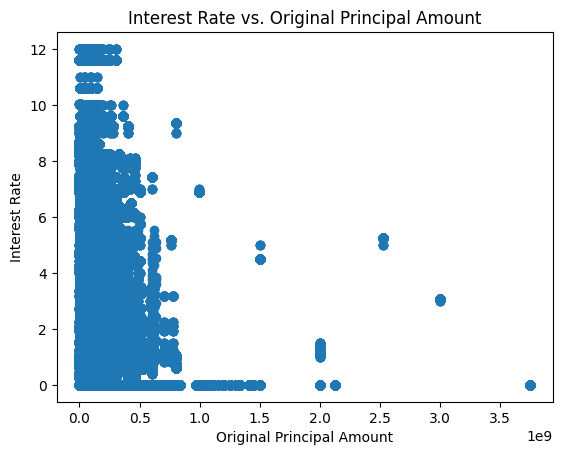

In [4]:
# Create scatterplot of original principal amount vs. interest rate
plt.scatter(df['Original Principal Amount'], df['Interest Rate'])
plt.xlabel('Original Principal Amount')
plt.ylabel('Interest Rate')
plt.title('Interest Rate vs. Original Principal Amount')
plt.show()


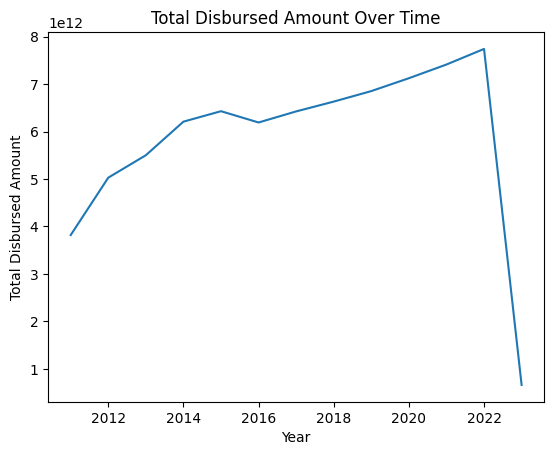

In [5]:
# Group data by year and calculate total disbursed amount for each year
df['Year'] = pd.DatetimeIndex(df['End of Period']).year
total_disbursed = df.groupby('Year')['Disbursed Amount'].sum()

# Create line plot of total disbursed amount over time
plt.plot(total_disbursed.index, total_disbursed.values)
plt.xlabel('Year')
plt.ylabel('Total Disbursed Amount')
plt.title('Total Disbursed Amount Over Time')
plt.show()


C:\Users\7 GPU Mining rig 1\AppData\Local\Temp\ipykernel_17100\989728558.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


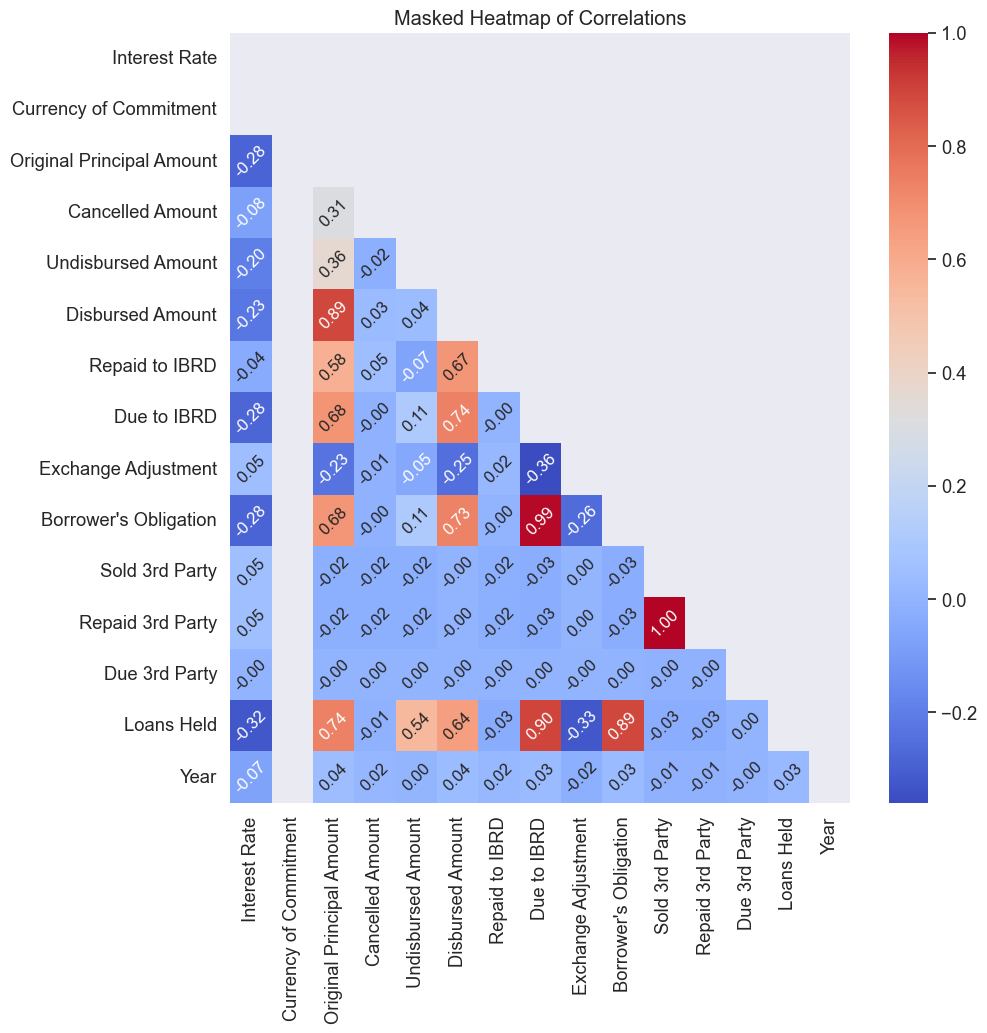

In [10]:
# Heatmap

sns.set(rc={'figure.figsize':(10,10)}, font_scale=1.2)
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt='.2f', annot_kws={'fontsize':12, 'rotation':45})
plt.title('Masked Heatmap of Correlations')
plt.savefig('./Images/heatmap_corr.png')
plt.show()


In [7]:
# Loans by Borrower
loans_by_borrower = df['Borrower'].value_counts()
print(loans_by_borrower)

Ministry of Finance                                  285177
MINISTERE DE L'ECONOMIE ET DES FINANCES               43174
CONTROLLER OF AID ACCOUNTS & AUDIT                    36264
Department of Finance                                 28988
NACIONAL FINANCIERA, S.N.C. NAFIN                     27308
                                                      ...  
Municipality of S????Bernardo do Campo                    1
Corporaci¢n Aut¢noma Regional deCundinam                  1
Municipality of S?o Bernardo do Campo                     1
Secr. De PlanejamentoOr???????????®ento e Tesouro         1
COMPAN DESENVOL  ACAO REGIO BAHIA                         1
Name: Borrower, Length: 1143, dtype: int64


In [8]:
# Interest Rate Counts
interest_rate_counts = df['Interest Rate'].value_counts()
print(interest_rate_counts)

0.00    273914
7.25     51243
8.50     37978
5.59     32118
7.43     31580
         ...  
4.80         1
3.31         1
5.29         1
3.68         1
4.73         1
Name: Interest Rate, Length: 558, dtype: int64
